# USA Healthcare Spending Versus Quality

#### Frank Baird
#### UCSanDiego DES200x Python for Data Science Week 6 - Mini Project

## Identifying a Research Question
I have read that the United States has the highest healthcare cost in the industrialized nations, 
but also has the worst quality of care within that group.

So I asked, can this claim be substantiated using the World Development Indicators?

The report I read is from Commonwealth Fund International,

https://www.commonwealthfund.org/publications/fund-reports/2017/jul/mirror-mirror-2017-international-comparison-reflects-flaws-and

If we look up this claim in the report, we notice that the conclusion of this report is less inflammatory than the one I recalled. Nonetheless, it provides a very detailed list of data used to support its claim that the US spends more on healthcare than other high-income countries, but has "previously documented gaps" in healthcare quality.

## Exploring the Data
The first thing to determine is what is meant by "high-income countries"? The data used by CFI is from the countries of Australia, Canada, France, Germany, the Netherlands, New Zealand, Norway, Sweden, Switzerland, the United Kingdom and the United States. That question is easy to answer, and fortunately our data covers all these countries.

The second thing to determine is how do we define "quality of care"? CFI used 72 indicators gathered from their own surveys and data from the Organisation for Economic Co-operation and Development (OECD), the World Health Organization (WHO), and the European Observatory on Health Systems and Policies. Our data is from a different dataset obtained from the World Bank (https://data.worldbank.org). Appendix A of the CFI report cited above gives very detailed descriptions of the indicators used. Most of these indicators have no exact analog in the WDI data, so I need to search the WDI indicators to find some reasonable set which can be used to answer the research question.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

In [5]:
# Read in the World Development Indicators Database
data = pd.read_csv('../Week-5-Visualization/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [9]:
# Just something different than head()
data.head(10000).tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
9995,Georgia,GEO,"Population, total",SP.POP.TOTL,1960,3.645600e+06
9996,Georgia,GEO,Rural population,SP.RUR.TOTL,1960,2.075477e+06
9997,Georgia,GEO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,5.693100e+01
9998,Georgia,GEO,Rural population growth (annual %),SP.RUR.TOTL.ZG,1960,9.867471e-01
9999,Georgia,GEO,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,1960,7.263288e+01


First, we need to find the earliest and latest years with significant data in them.

In [11]:
# Find the latest and earliest years in the data
print("Min year =", data['Year'].min(), "  Max =", data['Year'].max())

Min year = 1960   Max = 2015


Next let's find some health-related indicators. To keep the number of indicators down, narrow the search to just one country. But we also need to find out which years have useful data.

In [14]:
# Select health-related indicators for high-income countries
health_indicator = 'health'
health_year = [2013]
# During data exploration, use only one country to eliminate duplicate indicators
high_income_countries = ['USA']
# high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)
mask3 = data['CountryCode'].isin(high_income_countries)

# Apply the masks but not the year mask
stage = data[mask1 & mask3]  # mask2 & mask3]
stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1876480,United States,USA,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1989,99.000000
2613944,United States,USA,Health expenditure per capita (current US$),SH.XPD.PCAP,1995,3810.254767
2613945,United States,USA,"Health expenditure per capita, PPP (constant 2...",SH.XPD.PCAP.PP.KD,1995,3810.254767
2613946,United States,USA,"Health expenditure, private (% of GDP)",SH.XPD.PRIV.ZS,1995,7.229758
2613947,United States,USA,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,1995,5.932704
2613948,United States,USA,"Health expenditure, public (% of government ex...",SH.XPD.PUBL.GX.ZS,1995,15.983107
2613949,United States,USA,"Health expenditure, public (% of total health ...",SH.XPD.PUBL,1995,45.072905
2613950,United States,USA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1995,13.162462
2614098,United States,USA,Out-of-pocket health expenditure (% of private...,SH.XPD.OOPC.ZS,1995,26.390516
2614099,United States,USA,Out-of-pocket health expenditure (% of total e...,SH.XPD.OOPC.TO.ZS,1995,14.495544


Looking at this list, it seems good for measuring healthcare expenditures, but not so good for judging healthcare quality.
One indicator stands out as a good measure for assessing how much each country spends on healthcare, Health expenditure, total (% of GDP). Also note that good data is available form 1995 to 2013. 

Now let's look for indicators that might be good for measuring healthcare quality. Fortunately, the World Bank has a website devoted entirely to helping you explore the WDI data (http://wdil.worldbank.org/table). Click on the People tab and several health related indicators appear (2.12 through 2.19).

Given all the different data it is very difficult to find a single indicator which measures healthcare quality in this data set. Some interesting data can definitely be found. For example, the number of physicians.

In [16]:
# Select health-related indicators for high-income countries
health_indicator = 'Physician'
health_year = [2013]
# During data exploration, use only one country to eliminate duplicate indicators
high_income_countries = ['USA']
# high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)
mask3 = data['CountryCode'].isin(high_income_countries)

# Apply the masks but not the year mask
stage = data[mask1 & mask3]  # mask2 & mask3]
stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22364,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1960,1.100
166828,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1965,1.200
358143,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1970,1.200
707917,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1975,1.300
781329,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1976,1.300
856989,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1977,1.300
932653,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1978,1.400
1008479,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1979,1.400
1089779,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1980,1.500
1173716,United States,USA,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1981,1.500


From this it appears that number of physicians per 1,000 people might be one reasonable measure of healthcare quality. Note though that data is only available up to 2011.

Let's look at another indicator, mortality rates.

In [17]:
# Select health-related indicators for high-income countries
health_indicator = 'mortality'
health_year = [2013]
# During data exploration, use only one country to eliminate duplicate indicators
high_income_countries = ['USA']
# high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)
mask3 = data['CountryCode'].isin(high_income_countries)

# Apply the masks but not the year mask
stage = data[mask1 & mask3]  # mask2 & mask3]
stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22349,United States,USA,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,130.636
22350,United States,USA,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,1960,233.283
22351,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1960,25.900
22352,United States,USA,"Mortality rate, under-5 (per 1,000)",SH.DYN.MORT,1960,30.100
48828,United States,USA,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1961,126.591
48829,United States,USA,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,1961,226.660
48830,United States,USA,"Mortality rate, infant (per 1,000 live births)",SP.DYN.IMRT.IN,1961,25.400
48831,United States,USA,"Mortality rate, under-5 (per 1,000)",SH.DYN.MORT,1961,29.500
77215,United States,USA,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1962,128.620
77216,United States,USA,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,1962,229.805


This suggests that infant mortality rate might be a good indicator, with good data over the entire time span of the data.

Maternal mortality rate might also be good, but we need to find when good data for that indicator begins.

In [18]:
# Select health-related indicators for high-income countries
health_indicator = 'maternal mortality'
health_year = [2013]
# During data exploration, use only one country to eliminate duplicate indicators
high_income_countries = ['USA']
# high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)
mask3 = data['CountryCode'].isin(high_income_countries)

# Apply the masks but not the year mask
stage = data[mask1 & mask3]  # mask2 & mask3]
stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1993039,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,12.0
2108993,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1991,12.0
2230260,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1992,12.0
2354019,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1993,12.0
2479694,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1994,12.0
2614036,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1995,12.0
2748999,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1996,11.0
2749000,United States,USA,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,1996,7.6
2885304,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1997,11.0
3022654,United States,USA,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1998,11.0


So we have good data from 1990 to 2015 for maternal mortality.

Let's look at one more indicator of healthcare quality. Incidence of disease should be a good indicator, and the closest match is incidence of tuberculosis.

In [19]:
# Select health-related indicators for high-income countries
health_indicator = 'incidence of tuberculosis'
health_year = [2013]
# During data exploration, use only one country to eliminate duplicate indicators
high_income_countries = ['USA']
# high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)
mask3 = data['CountryCode'].isin(high_income_countries)

# Apply the masks but not the year mask
stage = data[mask1 & mask3]  # mask2 & mask3]
stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1992995,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1990,12.0
2108946,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1991,12.0
2230220,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1992,11.0
2353979,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1993,11.0
2479647,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1994,10.0
2613985,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1995,9.6
2748951,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1996,9.0
2885229,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1997,8.4
3022584,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1998,7.8
3164508,United States,USA,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,1999,7.2


Good data is available for the incidence of tuberculosis for 1990 through 2014.

Looking at the chosen indicators and the years for which we have good data, this notebook will use data from 1995 to 2013.

## Reporting Findings

First let's look at the assertion that the US spends more on healthcare than other high-income countries.

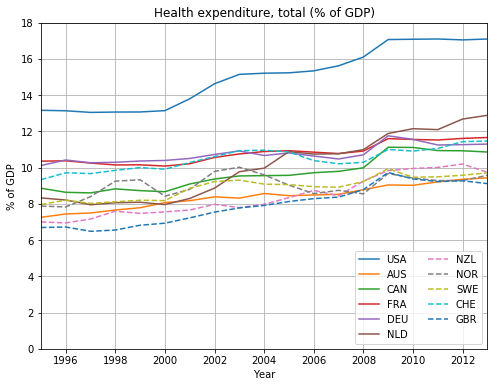

In [23]:
health_indicator = 'Health expenditure, total'
health_year = [y for y in range(1995, 2014)]
high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)

# Use line plots
ls = 'solid'
for country in high_income_countries:
    if country == 'NZL':
        ls = 'dashed'
    mask3 = data['CountryCode'].isin([country])
    stage = data[mask1 & mask2 & mask3]
    plt.plot(stage['Year'].values, stage['Value'].values, label = country, linestyle = ls)
    
# Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add grid lines and legend
plt.grid(True)
plt.legend(loc='lower right', ncol=2)

# Label the axes
plt.xlabel('Year')
plt.ylabel("% of GDP")

# Label the figure
plt.title(stage['IndicatorName'].iloc[0])

# To be more honest, start the y axis at 0
plt.axis([1995, 2013, 0, 18])

plt.show()

So we can see that the USA spends more on healthcare as a percentage of GDP than other high-income countries, with the gap widening over time.

Now let's start looking at healthcare quality indicators, starting with number of physicians. Note that unlike all the other indicators, data is available for the USA only up to 2011, not 2013.

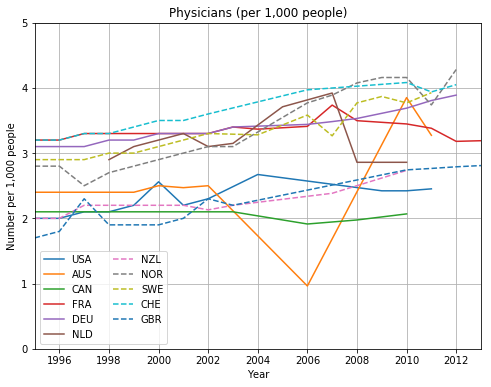

In [25]:
health_indicator = 'Physician'
health_year = [y for y in range(1995, 2014)]
high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)

# Use line plots
ls = 'solid'
for country in high_income_countries:
    if country == 'NZL':
        ls = 'dashed'
    mask3 = data['CountryCode'].isin([country])
    stage = data[mask1 & mask2 & mask3]
    plt.plot(stage['Year'].values, stage['Value'].values, label = country, linestyle = ls)
    
# Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add grid lines and legend
plt.grid(True)
plt.legend(loc='lower left', ncol=2)

# Label the axes
plt.xlabel('Year')
plt.ylabel("Number per 1,000 people")

# Label the figure
plt.title(stage['IndicatorName'].iloc[0])

# To be more honest, start the y axis at 0
plt.axis([1995, 2013, 0, 5])

plt.show()

We can see that the USA is grouped fairly closely with the other countries, although somewhat at the bottom.

Now let's look at infant mortality rate.

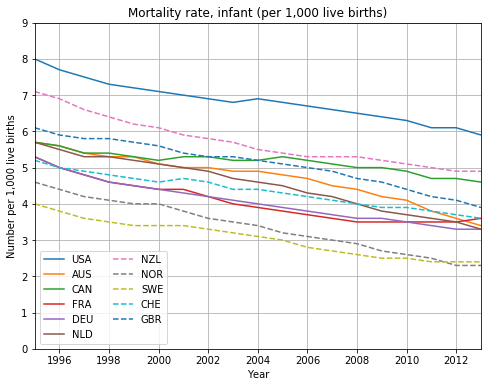

In [26]:
health_indicator = 'Mortality rate, infant \('
health_year = [y for y in range(1995, 2014)]
high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)

# Use line plots
ls = 'solid'
for country in high_income_countries:
    if country == 'NZL':
        ls = 'dashed'
    mask3 = data['CountryCode'].isin([country])
    stage = data[mask1 & mask2 & mask3]
    plt.plot(stage['Year'].values, stage['Value'].values, label = country, linestyle = ls)
    
# Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add grid lines and legend
plt.grid(True)
plt.legend(loc='lower left', ncol=2)

# Label the axes
plt.xlabel('Year')
plt.ylabel("Number per 1,000 live births")

# Label the figure
plt.title(stage['IndicatorName'].iloc[0])

# To be more honest, start the y axis at 0
plt.axis([1995, 2013, 0, 9])

plt.show()

Here we see that the infant mortality rate for the USA is close to the other countries, but always the highest by a significant margin.

Next, let's look at maternal mortality rate.

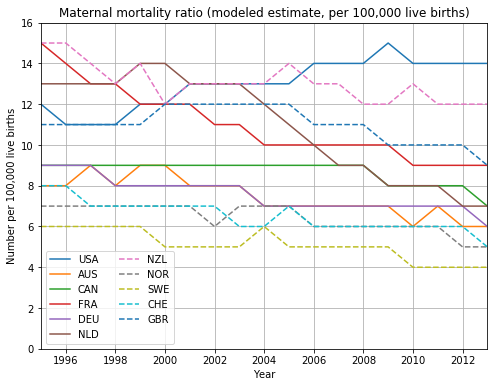

In [27]:
health_indicator = 'Maternal mortality ratio \(modeled'
health_year = [y for y in range(1995, 2014)]
high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)

# Use line plots
ls = 'solid'
for country in high_income_countries:
    if country == 'NZL':
        ls = 'dashed'
    mask3 = data['CountryCode'].isin([country])
    stage = data[mask1 & mask2 & mask3]
    plt.plot(stage['Year'].values, stage['Value'].values, label = country, linestyle = ls)
    
# Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add grid lines and legend
plt.grid(True)
plt.legend(loc='lower left', ncol=2)

# Label the axes
plt.xlabel('Year')
plt.ylabel("Number per 100,000 live births")

# Label the figure
plt.title(stage['IndicatorName'].iloc[0])

# To be more honest, start the y axis at 0
plt.axis([1995, 2013, 0, 16])

plt.show()

Here we see that since 2006, the USA has had the highest maternal mortality rate among high-income countries. In addition, since 2000, the trend of the USA has been increasing while the other countries are decreasing.

Lastly, let's look at the incidence of tuberculosis.

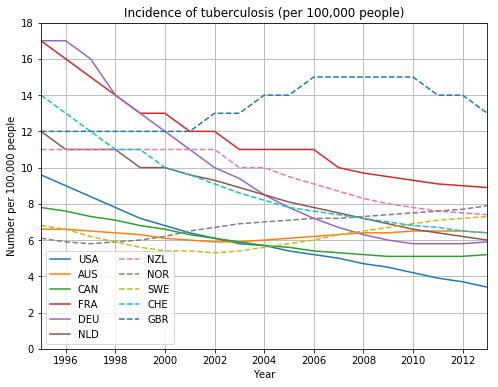

In [28]:
health_indicator = 'Incidence of tuberculosis'
health_year = [y for y in range(1995, 2014)]
high_income_countries = ['USA', 'AUS', 'CAN', 'FRA', 'DEU', 'NLD', 'NZL', 'NOR', 'SWE', 'CHE', 'GBR']

mask1 = data['IndicatorName'].str.contains(health_indicator, case = False)
mask2 = data['Year'].isin(health_year)

# Use line plots
ls = 'solid'
for country in high_income_countries:
    if country == 'NZL':
        ls = 'dashed'
    mask3 = data['CountryCode'].isin([country])
    stage = data[mask1 & mask2 & mask3]
    plt.plot(stage['Year'].values, stage['Value'].values, label = country, linestyle = ls)
    
# Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add grid lines and legend
plt.grid(True)
plt.legend(loc='lower left', ncol=2)

# Label the axes
plt.xlabel('Year')
plt.ylabel("Number per 100,000 people")

# Label the figure
plt.title(stage['IndicatorName'].iloc[0])

# To be more honest, start the y axis at 0
plt.axis([1995, 2013, 0, 18])

plt.show()

Now we see one indicator in which the USA is now the best among high-income countries. In fact, since 2006 the USA has been on par or better than the other countries.

## Conclusions

The original question was can we corroborate the claim that the USA spends more on healthcare than any other high-income country but simultaneously delivers a lower standard of care than those countries.

Clearly, this dataset supports the first part of this claim very strongly. The USA spends a significantly larger portion of its GDP than the other countries on healthcare. I conclude that part of the claim to be true. 

The second part of the claim is a bit more difficult to corroborate. I attempted to find several indicators that give a reasonable amount of insight into the quality of healthcare provided by these countries. Of the 4 indicators, 3 of them showed the USA underperforming relative to the other countries, but outperforming them in 1 indicator. It is possible that there are other better indicators, and that these 4 are not the best. Therefore I conclude that the second claim is partially true, and that the overall claim is **mostly true**.

Please note that this finding is highly dependent on the data *in this dataset*. The original report, cited at the top, uses many more indicators and goes into far more detailed analysis than is possible here. That report folds all their indicators into one singe score for healthcare quality, and no such indicator is available in this dataset. Unfortunately, the authors do not publish their dataset electronically, although they have provided extensive tables showing the data in printed form.